In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from difflib import SequenceMatcher
import numpy as np
import re
warnings.filterwarnings("ignore")

In [2]:
bonne_df = pd.read_csv('1000Bnla01.csv')
mauvaise_df = pd.read_csv('1000Mvla01.csv')
bonne_df.shape

(1000, 51)

In [3]:
bonne_df.columns = ['cout'] + [i for i in range(1, 51)]
bonne_df.index = ["v" + str(i) for i in range(1000)]
mauvaise_df.columns = ['cout'] + [i for i in range(1, 51)]
mauvaise_df.index = ["v" + str(i) for i in range(1000)]

In [4]:
bonne_df = bonne_df.sort_values(by=['cout'])
bonne_cout = bonne_df['cout']
bonne_df = bonne_df.T
bonne_df.columns = ["v" + str(i) for i in range(1000)]
bonne_df.head()

v0   v1   v2   v3   v4   v5   v6   v7   v8   v9  ...  v990  v991  v992  \
cout  666  666  666  666  666  666  666  666  666  666  ...   720   720   720   
1       1   10    2   10    7    4    7    4    5    2  ...     2     1     1   
2       9    1    9    8    5    7   10    5    6    6  ...     4    10     1   
3      10    7    8    7    5    5    5    4    7    4  ...     5     7     4   
4       9    6    9    5   10   10    1    7   10   10  ...     3     8     7   

      v993  v994  v995  v996  v997  v998  v999  
cout   720   720   720   720   720   720   720  
1        4     5     7     6     7     2     2  
2        1     4    10     3     6    10     4  
3        3     3     9    10     6     9    10  
4        8     7     7     6     1     4     1  

[5 rows x 1000 columns]

In [5]:
b_df = bonne_df.drop('cout')
l = b_df.columns
l = l[1:]
Hamming_distance = []
x = 'v0'
for y in l :
    Hamming_distance.append(hamming(b_df[x].values, b_df[y].values) * 50)


In [6]:
b_df = pd.DataFrame(zip(bonne_cout[1:], Hamming_distance), columns=['cout', 'distance de la so'])

In [7]:
b_df.head()

cout  distance de la so
0   666               48.0
1   666               46.0
2   666               46.0
3   666               43.0
4   666               45.0

In [8]:
moy_dist = b_df.groupby(['distance de la so']).mean()

In [9]:
moy_dist.head()

cout
distance de la so            
38.0               692.333333
39.0               700.125000
40.0               698.774194
41.0               701.423077
42.0               700.308824

In [10]:
a = [int(x) for x in moy_dist.index]
b = moy_dist['cout']

In [11]:
b_df = pd.DataFrame(zip(a,b), columns=['distance de la so', 'cout moy'])

In [12]:
b_df.head()

distance de la so    cout moy
0                 38  692.333333
1                 39  700.125000
2                 40  698.774194
3                 41  701.423077
4                 42  700.308824

<AxesSubplot:xlabel='distance de la so', ylabel='cout moy'>

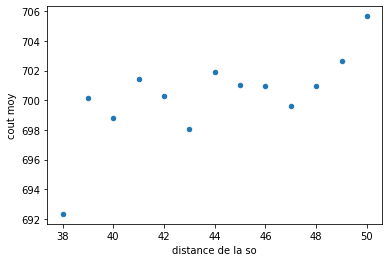

In [13]:
b_df.plot.scatter('distance de la so', 'cout moy')

In [14]:
b_df.corr()

distance de la so  cout moy
distance de la so           1.000000  0.704685
cout moy                    0.704685  1.000000

In [15]:
mauvaise_df = mauvaise_df.sort_values(by=['cout'], ascending = False)
mauvaise_cout = mauvaise_df['cout']
mauvaise_df = mauvaise_df.T
mauvaise_df.columns = ["v" + str(i) for i in range(1000)]
mauvaise_df.head()

v0    v1    v2    v3    v4    v5    v6    v7    v8    v9  ...  v990  \
cout  1654  1612  1592  1584  1581  1561  1546  1533  1530  1522  ...   876   
1       10    10     3    10     8     7     1     3     4     2  ...     1   
2       10     1     7     1     1     7     2     2     8     3  ...     1   
3        2    10     7     5     2     3     7     7     3     4  ...     7   
4       10     9     2     8     8     7     1     2     4     7  ...     6   

      v991  v992  v993  v994  v995  v996  v997  v998  v999  
cout   875   873   862   839   837   837   832   798   797  
1        7     1     9     6     9    10     1     1     9  
2       10     1     7     1     6     8     4     4     3  
3        1    10     8     5     9     9     8     8     5  
4        2     9     9     5     2     5     7     7    10  

[5 rows x 1000 columns]

In [16]:
m_df = mauvaise_df.drop('cout')
l = m_df.columns
l = l[1:]
Hamming_distance = []
x = 'v0'
for y in l :
    Hamming_distance.append(hamming(m_df[x].values, m_df[y].values) * 50)

In [17]:
m_df = pd.DataFrame(zip(mauvaise_cout[1:], Hamming_distance), columns=['cout', 'distance de la pms'])

In [18]:
m_df.head()

cout  distance de la pms
0  1612                45.0
1  1592                43.0
2  1584                44.0
3  1581                45.0
4  1561                46.0

In [19]:
moy_dist = m_df.groupby(['distance de la pms']).mean()

In [20]:
moy_dist.head()

cout
distance de la pms             
35.0                1089.000000
36.0                 981.000000
37.0                1118.000000
38.0                 997.000000
39.0                1149.833333

In [21]:
a = [int(x) for x in moy_dist.index]
b = moy_dist['cout']
m_df = pd.DataFrame(zip(a,b), columns=['distance de la pms', 'cout moy'])
m_df.head()

distance de la pms     cout moy
0                  35  1089.000000
1                  36   981.000000
2                  37  1118.000000
3                  38   997.000000
4                  39  1149.833333

<AxesSubplot:xlabel='distance de la pms', ylabel='cout moy'>

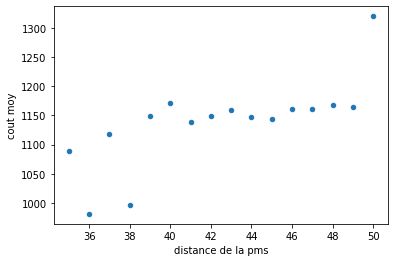

In [22]:
m_df.plot.scatter('distance de la pms', 'cout moy')

In [23]:
m_df.corr()

distance de la pms  cout moy
distance de la pms            1.000000  0.730718
cout moy                      0.730718  1.000000

In [24]:
df = {'distance de la so' : 0, 'cout moy' : 666}

b_df = b_df.append(df, ignore_index = True)


In [33]:
b_df.head()

distance de la so    cout moy
0                 38  692.333333
1                 39  700.125000
2                 40  698.774194
3                 41  701.423077
4                 42  700.308824